In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [14]:
df = pd.read_csv("C:/Users/user/Documents/PYTHON/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df = pd.get_dummies(df, columns = ["sex","smoker","region"], drop_first = True)

In [18]:
# Dimensions
print("Dimensions du dataset :", df.shape)

Dimensions du dataset : (1338, 9)


In [20]:
# Aperçu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB
None


In [22]:
# Statistiques descriptives
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


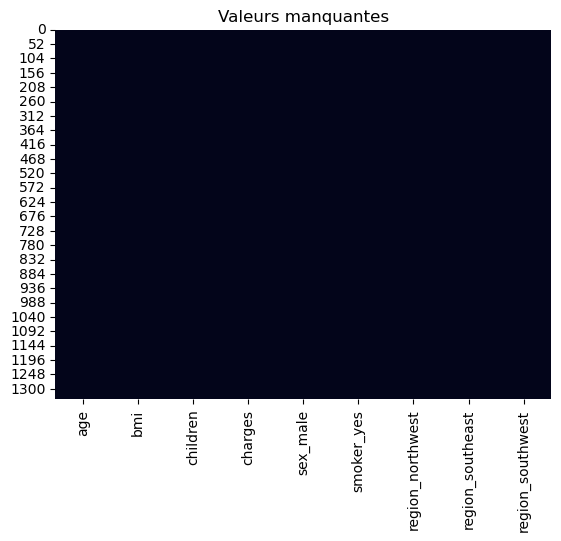

In [24]:
# Valeurs manquantes
sns.heatmap(df.isnull(), cbar=False)
plt.title("Valeurs manquantes")
plt.show()

NameError: name 'aplt' is not defined

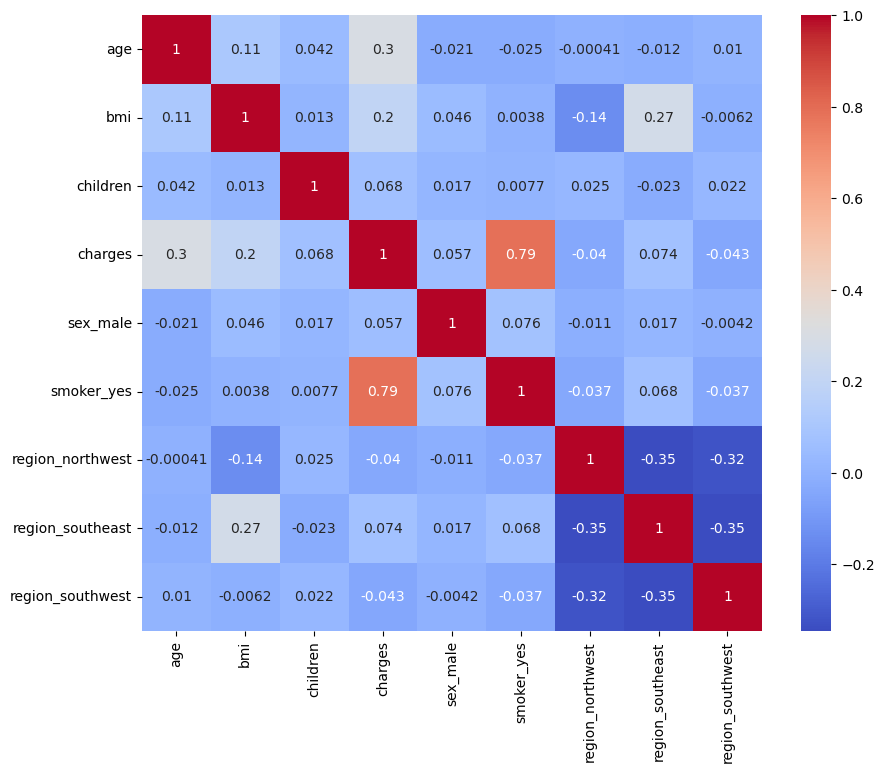

In [25]:
# Corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
aplt.title("Matrice de corrélation")
plt.show()

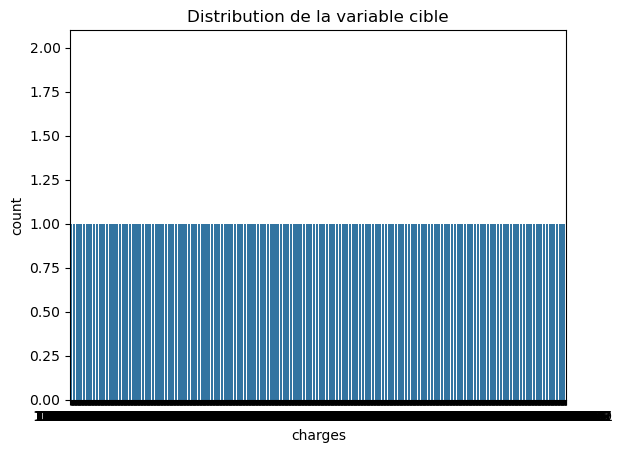

In [27]:
# Distribution de la variable cible
sns.countplot(x='charges', data=df)
plt.title("Distribution de la variable cible")
plt.show()

In [32]:
# Variables explicatives et cible
X = df.drop('charges', axis=1)
y = df['charges']

In [34]:
# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Séparation entraînement/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [38]:
# 📁 6. Entraînement du modèle

# Choisis LinearRegression() ou LogisticRegression()
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)
print("MSE :", mean_squared_error(y_test,y_pred))
print("MAE :",mean_absolute_error(y_test,y_pred))
print("R² Score :", r2_score(y_test , y_pred))

MSE : 33596915.851361476
MAE : 4181.194473753651
R² Score : 0.7835929767120722
